# LOGISTICS REGRESSION ( SALARY STATUS PREDICTION)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(r"C:\Users\teach\Downloads\1659543803income-iitm-1.csv")

In [5]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [7]:
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

# OUTLIER TREATMENT

In [8]:
df_o=df.copy()

<Axes: ylabel='age'>

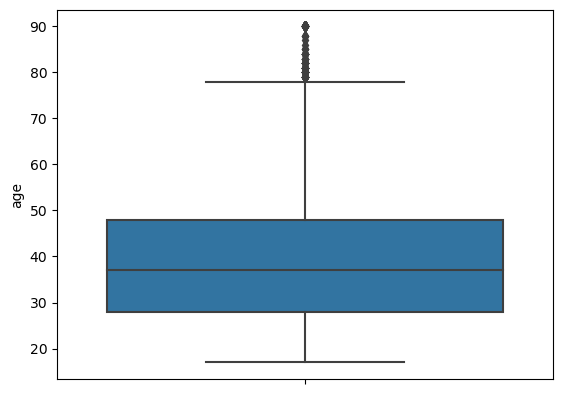

In [9]:
sns.boxplot(y=df_o["age"])

In [10]:
q1=df["age"].quantile(.25)
q1

28.0

In [11]:
q3=df["age"].quantile(.75)
q3

48.0

In [12]:
iqr=q3-q1
iqr

20.0

In [13]:
lower_fence=q1-(1.5*iqr)
lower_fence

-2.0

In [14]:
upper_fence=q3+(1.5*iqr)
upper_fence

78.0

In [17]:
df.loc[df["age"]>78]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
469,81,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,"less than or equal to 50,000"
588,90,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
713,88,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
1465,90,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,"less than or equal to 50,000"
1828,90,Private,Some-college,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31448,85,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,"less than or equal to 50,000"
31481,82,?,HS-grad,Never-married,?,Not-in-family,White,Male,0,0,3,United-States,"less than or equal to 50,000"
31616,79,Private,Some-college,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,"less than or equal to 50,000"
31763,90,Private,HS-grad,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,"less than or equal to 50,000"


In [15]:
df_o=df.loc[(df_o["age"]>17) & (df_o["age"]<=78)]

In [16]:
df_o.shape

(31445, 13)

# HANDLING CATEGORICAL FEATURE

#### Method-1 One Hot Encoding

In [22]:
df_o.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [23]:
df_o.shape

(31838, 13)

In [17]:
df_ob_ohc=pd.get_dummies(df_o,drop_first=True)
df_ob_ohc.head()

,age,capitalgain,capitalloss,hoursperweek,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,"SalStat_ less than or equal to 50,000"
0,45,0,0,28,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,24,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,44,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,27,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20,0,0,35,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


### Method-2 Take top occurred labels from a column (merely for nominal feature)

In [26]:
df_o.head(2)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"


In [22]:
df_o["nativecountry"].value_counts().head(10).index

Index([' United-States', ' Mexico', ' Philippines', ' Germany', ' Canada',
       ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba', ' England'],
      dtype='object')

In [23]:
top_10=[i for i in df_o["nativecountry"].value_counts().head(10).index]

In [24]:
top_10

[' United-States',
 ' Mexico',
 ' Philippines',
 ' Germany',
 ' Canada',
 ' Puerto-Rico',
 ' El-Salvador',
 ' India',
 ' Cuba',
 ' England']

In [25]:
for i in top_10:
    df_o[i]=np.where(df_o["nativecountry"]== i,1,0)    

In [26]:
df_o.head(2)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,...,United-States,Mexico,Philippines,Germany,Canada,Puerto-Rico,El-Salvador,India,Cuba,England
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,...,1,0,0,0,0,0,0,0,0,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
df_o["JobType"].value_counts()

 Private             21928
 Self-emp-not-inc     2469
 Local-gov            2044
 ?                    1711
 State-gov            1276
 Self-emp-inc         1057
 Federal-gov           940
 Without-pay            14
 Never-worked            6
Name: JobType, dtype: int64

In [29]:
df_o.loc[df_o["JobType"]==" ?","JobType"]

Series([], Name: JobType, dtype: object)

In [31]:
df_o["JobType"].mode()[0]

' Private'

In [30]:
df_o["occupation"].value_counts()

 Craft-repair         4011
 Prof-specialty       4009
 Exec-managerial      3969
 Adm-clerical         3686
 Sales                3484
 Other-service        3070
 Machine-op-inspct    1961
 ?                    1717
 Transport-moving     1567
 Handlers-cleaners    1309
 Farming-fishing       970
 Tech-support          911
 Protective-serv       639
 Priv-house-serv       133
 Armed-Forces            9
Name: occupation, dtype: int64

In [28]:
df_o.loc[df_o["JobType"]==" ?",["JobType"]]=df_o["JobType"].mode()[0]

In [31]:
df_o.loc[df_o["occupation"]==" ?",["occupation"]]=df_o["occupation"].mode()[0]

In [32]:
df_o["JobType"].value_counts()

 Private             23639
 Self-emp-not-inc     2469
 Local-gov            2044
 State-gov            1276
 Self-emp-inc         1057
 Federal-gov           940
 Without-pay            14
 Never-worked            6
Name: JobType, dtype: int64

In [33]:
top_6=[i for i in df_o["JobType"].value_counts().head(6).index]

In [34]:
top_6

[' Private',
 ' Self-emp-not-inc',
 ' Local-gov',
 ' State-gov',
 ' Self-emp-inc',
 ' Federal-gov']

In [35]:
for i in top_6:
    df_o[i]=np.where(df_o["JobType"]== i,1,0)    

In [36]:
df_o.head(2)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,...,El-Salvador,India,Cuba,England,Private,Self-emp-not-inc,Local-gov,State-gov,Self-emp-inc,Federal-gov
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,...,0,0,0,0,1,0,0,0,0,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
df_o["occupation"].value_counts()

 Craft-repair         5728
 Prof-specialty       4009
 Exec-managerial      3969
 Adm-clerical         3686
 Sales                3484
 Other-service        3070
 Machine-op-inspct    1961
 Transport-moving     1567
 Handlers-cleaners    1309
 Farming-fishing       970
 Tech-support          911
 Protective-serv       639
 Priv-house-serv       133
 Armed-Forces            9
Name: occupation, dtype: int64

In [38]:
top_11=[i for i in df_o["occupation"].value_counts().head(11).index]

In [39]:
for i in top_11:
    df_o[i]=np.where(df_o["occupation"]==i,1,0)

In [40]:
df_o.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,...,Prof-specialty,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,...,0,0,1,0,0,0,0,0,0,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,...,1,0,0,0,0,0,0,0,0,0
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
df_o["maritalstatus"].value_counts()

 Married-civ-spouse       14623
 Never-married            10077
 Divorced                  4389
 Separated                 1003
 Widowed                    935
 Married-spouse-absent      395
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

In [42]:
top_5=[i for i in df_o["maritalstatus"].value_counts().head(5).index]

In [43]:
for i in top_5:
    df_o[i]=np.where(df_o["maritalstatus"]==i,1,0)

In [44]:
df_o["relationship"].value_counts()

 Husband           12884
 Not-in-family      8091
 Own-child          4641
 Unmarried          3368
 Wife               1530
 Other-relative      931
Name: relationship, dtype: int64

In [45]:
top_5=[i for i in df_o["relationship"].value_counts().head(5).index]

In [46]:
for i in top_5:
    df_o[i]=np.where(df_o["relationship"]==i,1,0)

In [47]:
df_o["race"].value_counts()

 White                 26957
 Black                  2987
 Asian-Pac-Islander      949
 Amer-Indian-Eskimo      306
 Other                   246
Name: race, dtype: int64

In [48]:
top_2=[i for i in df_o["race"].value_counts().head(2).index]

In [49]:
for i in top_2:
    df_o[i]=np.where(df_o["race"]==i,1,0)

In [50]:
df_o.head(2)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,...,Divorced,Separated,Widowed,Husband,Not-in-family,Own-child,Unmarried,Wife,White,Black
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,...,1,0,0,0,1,0,0,0,1,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,...,0,0,0,0,0,1,0,0,1,0


In [51]:
df_o["gender"].unique()

array([' Female', ' Male'], dtype=object)

In [52]:
df_o["gender"]=df_o["gender"].map({' Male':0,' Female':1})

In [53]:
df_o['SalStat'].unique()

array([' less than or equal to 50,000', ' greater than 50,000'],
      dtype=object)

In [54]:
df_o['SalStat']=df_o['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

### Method-2 Ordinal Encoding ( merely for Ordinal feature)

In [67]:
df_o["EdType"].value_counts()

 HS-grad         10319
 Some-college     7170
 Bachelors        5194
 Masters          1666
 Assoc-voc        1362
 11th             1163
 Assoc-acdm       1052
 10th              917
 7th-8th           613
 Prof-school       552
 9th               504
 12th              416
 Doctorate         386
 5th-6th           315
 1st-4th           159
 Preschool          50
Name: EdType, dtype: int64

In [56]:
df_o["EdType"].unique()

array([' HS-grad', ' Some-college', ' 9th', ' Assoc-voc', ' Assoc-acdm',
       ' Bachelors', ' 1st-4th', ' Masters', ' 10th', ' 12th', ' 5th-6th',
       ' 11th', ' Prof-school', ' Doctorate', ' 7th-8th', ' Preschool'],
      dtype=object)

In [56]:
dic={' Preschool':1,' 1st-4th':2,' 5th-6th':3,' 7th-8th':4,' 9th':5,' 10th':6, ' 11th':7,' 12th':8,' HS-grad':9, ' Prof-school':10,' Assoc-voc':11,' Assoc-acdm':12,' Some-college':13,' Bachelors':13, ' Masters':14,' Doctorate':15}

In [57]:
dic

{' Preschool': 1,
 ' 1st-4th': 2,
 ' 5th-6th': 3,
 ' 7th-8th': 4,
 ' 9th': 5,
 ' 10th': 6,
 ' 11th': 7,
 ' 12th': 8,
 ' HS-grad': 9,
 ' Prof-school': 10,
 ' Assoc-voc': 11,
 ' Assoc-acdm': 12,
 ' Some-college': 13,
 ' Bachelors': 13,
 ' Masters': 14,
 ' Doctorate': 15}

In [59]:
df_o["EdType"]=df_o['EdType'].map(dic)

In [60]:
df_o.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,...,Divorced,Separated,Widowed,Husband,Not-in-family,Own-child,Unmarried,Wife,White,Black
0,45,Private,9,Divorced,Adm-clerical,Not-in-family,White,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,24,Federal-gov,9,Never-married,Armed-Forces,Own-child,White,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,44,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,27,Private,5,Never-married,Craft-repair,Other-relative,White,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,20,Private,13,Never-married,Sales,Not-in-family,White,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# FEATURE SELECTION

In [205]:
df_o.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat', ' United-States', ' Mexico',
       ' Philippines', ' Germany', ' Canada', ' Puerto-Rico', ' El-Salvador',
       ' India', ' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Prof-specialty', ' Craft-repair',
       ' Exec-managerial', ' Adm-clerical', ' Sales', ' Other-service',
       ' Machine-op-inspct', ' Transport-moving', ' Handlers-cleaners',
       ' Farming-fishing', ' Tech-support', ' Protective-serv',
       ' Priv-house-serv', ' Married-civ-spouse', ' Never-married',
       ' Divorced', ' Separated', ' Widowed', ' Husband', ' Not-in-family',
       ' Own-child', ' Unmarried', ' Wife', ' White', ' Black'],
      dtype='object')

In [61]:
df_o=df_o.drop(['JobType', 'maritalstatus', 'occupation',
       'relationship', 'race',"nativecountry"],axis=1)

In [62]:
df_o.head()

,age,EdType,gender,capitalgain,capitalloss,hoursperweek,SalStat,United-States,Mexico,Philippines,...,Divorced,Separated,Widowed,Husband,Not-in-family,Own-child,Unmarried,Wife,White,Black
0,45,9,1,0,0,28,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,24,9,0,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,44,13,0,0,0,40,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,27,5,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,20,13,0,0,0,35,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


## EMBEDDED METHOD (Feature Importance test )

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
x=df_o.drop(["SalStat"],axis=1)

In [65]:
y=df_o["SalStat"]

In [66]:
etc=ExtraTreesClassifier(n_estimators=500)
etc.fit(x,y)

ExtraTreesClassifier(n_estimators=500)

In [69]:
etc.feature_importances_*100

array([23.08040088,  9.84429956,  1.59866037,  8.97588733,  3.0103139 ,
       13.35901448,  0.78364407,  0.31383115,  0.15483392,  0.15314188,
        0.14415539,  0.09235481,  0.04617434,  0.11522724,  0.09252625,
        0.12648062,  0.85563836,  0.7999072 ,  0.48434039,  0.39014532,
        0.66431288,  0.47497332,  0.90962286,  2.89287339,  2.95065443,
        0.49007594,  0.63414863,  1.04439416,  0.51889245,  0.50764499,
        0.47493135,  0.576237  ,  0.46690272,  8.1332215 ,  3.03902033,
        0.72708692,  0.21492045,  0.20268698,  5.13430528,  1.26659914,
        1.16822258,  0.56986836,  1.14465714,  0.83261457,  0.54015518])

In [70]:
etc_score=etc.feature_importances_*100

In [71]:
score_ETC=pd.DataFrame(etc_score)

In [72]:
x.columns

Index(['age', 'EdType', 'gender', 'capitalgain', 'capitalloss', 'hoursperweek',
       ' United-States', ' Mexico', ' Philippines', ' Germany', ' Canada',
       ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba', ' England',
       ' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Craft-repair', ' Prof-specialty',
       ' Exec-managerial', ' Adm-clerical', ' Sales', ' Other-service',
       ' Machine-op-inspct', ' Transport-moving', ' Handlers-cleaners',
       ' Farming-fishing', ' Tech-support', ' Married-civ-spouse',
       ' Never-married', ' Divorced', ' Separated', ' Widowed', ' Husband',
       ' Not-in-family', ' Own-child', ' Unmarried', ' Wife', ' White',
       ' Black'],
      dtype='object')

In [73]:
cols=x.columns
feature_ETC=pd.DataFrame(cols)

In [74]:
feature_ETC

,0
0,age
1,EdType
2,gender
3,capitalgain
4,capitalloss
5,hoursperweek
6,United-States
7,Mexico
8,Philippines
9,Germany


In [75]:
score_ETC

,0
0,23.080401
1,9.844300
2,1.598660
3,8.975887
4,3.010314
5,13.359014
6,0.783644
7,0.313831
8,0.154834
9,0.153142


In [76]:
Final_score_ETC=pd.concat([feature_ETC,score_ETC],axis=1)
Final_score_ETC.columns=["features","ETC_score"]

In [77]:
Final_score_ETC

,features,ETC_score
0,age,23.080401
1,EdType,9.844300
2,gender,1.598660
3,capitalgain,8.975887
4,capitalloss,3.010314
5,hoursperweek,13.359014
6,United-States,0.783644
7,Mexico,0.313831
8,Philippines,0.154834
9,Germany,0.153142


In [78]:



Final_score_ETC=Final_score_ETC.nlargest(20,"ETC_score")
Final_score_ETC

,features,ETC_score
0,age,23.080401
5,hoursperweek,13.359014
1,EdType,9.844300
3,capitalgain,8.975887
33,Married-civ-spouse,8.133221
38,Husband,5.134305
34,Never-married,3.039020
4,capitalloss,3.010314
24,Exec-managerial,2.950654
23,Prof-specialty,2.892873


               features  ETC_score
0                   age  23.080401
5          hoursperweek  13.359014
1                EdType   9.844300
3           capitalgain   8.975887
33   Married-civ-spouse   8.133221
38              Husband   5.134305
34        Never-married   3.039020
4           capitalloss   3.010314
24      Exec-managerial   2.950654
23       Prof-specialty   2.892873


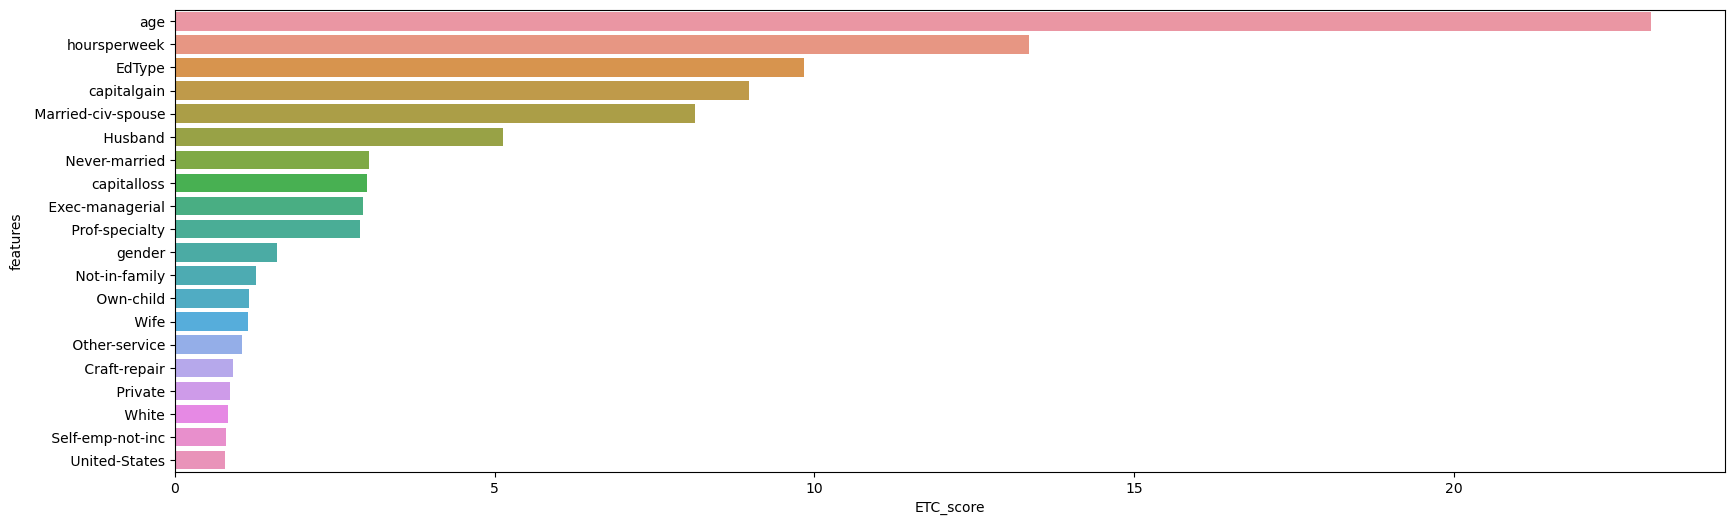

In [79]:
plt.figure(figsize=(20,6))
sns.barplot(x="ETC_score",y="features",data=Final_score_ETC)
print(Final_score_ETC.nlargest(10,"ETC_score")) 

In [80]:
top_20_feature=[i for i in Final_score_ETC["features"].head(20)]

In [82]:
df_final=df_o[top_20_feature]

In [83]:
df_final.head()

,age,hoursperweek,EdType,capitalgain,Married-civ-spouse,Husband,Never-married,capitalloss,Exec-managerial,Prof-specialty,gender,Not-in-family,Own-child,Wife,Other-service,Craft-repair,Private,White,Self-emp-not-inc,United-States
0,45,28,9,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1
1,24,40,9,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
2,44,40,13,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1
3,27,40,5,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0
4,20,35,13,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1


# Feature Scaling

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler=StandardScaler()

In [86]:
df_scaled=scaler.fit_transform(df_final)

In [87]:
df_scaled

array([[ 0.48060743, -1.04742302, -0.6228693 , ...,  0.40802864,
        -0.29190486,  0.31117411],
       [-1.10800539, -0.05846871, -0.6228693 , ...,  0.40802864,
        -0.29190486,  0.31117411],
       [ 0.4049592 , -0.05846871,  0.84222589, ...,  0.40802864,
        -0.29190486,  0.31117411],
       ...,
       [-1.18365362, -0.05846871,  0.84222589, ...,  0.40802864,
        -0.29190486,  0.31117411],
       [ 0.25366274, -0.05846871,  0.84222589, ...,  0.40802864,
        -0.29190486,  0.31117411],
       [-0.72976424, -0.05846871,  0.84222589, ...,  0.40802864,
        -0.29190486,  0.31117411]])

# BUILD LOGISTICS REGRESSION MODEL

In [207]:
x=pd.DataFrame(df_scaled,columns=df_final.columns)

In [208]:
y=df_o["SalStat"]


In [209]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [210]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

log_model=lr.fit(X_train,Y_train)

In [211]:
lr.score(X_train,Y_train)

0.8394606284187762

# TEST THE MODEL ON TESTING DATASET

In [212]:
Y_pred=log_model.predict(X_test)

In [213]:
y_pred_prob=log_model.predict_proba(X_test)

In [214]:
y_pred_prob=pd.DataFrame(y_pred_prob)

In [215]:
y_prob=y_pred_prob.iloc[:,1]

In [216]:
y_pred=pd.DataFrame(Y_pred)

In [217]:
q=pd.concat([y_prob,y_pred],axis=1)

In [218]:
q.columns=["y_prob_model","y_pred_model"]

In [219]:
pd.set_option("display.max_rows",None)

In [226]:
q["new_y_pred"]=2

for i,j in enumerate(q["y_prob_model"]):
    if j<=.7:
        q["new_y_pred"][i]=0
    else:
        q["new_y_pred"][i]=1
        

In [227]:
y_test=pd.DataFrame(Y_pred)

In [228]:
q

,y_prob_model,y_pred_model,new_y_pred
0,0.000442,0,0
1,0.622659,1,0
2,0.127218,0,0
3,0.015882,0,0
4,0.235065,0,0
5,0.258564,0,0
6,0.002010,0,0
7,0.204292,0,0
8,0.006670,0,0
9,0.227888,0,0


In [229]:
from sklearn.metrics import classification_report,confusion_matrix

In [230]:
print(confusion_matrix(y_test,q["new_y_pred"]))

[[6347    0]
 [ 736  779]]


In [231]:
print(classification_report(y_test,q["new_y_pred"]))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6347
           1       1.00      0.51      0.68      1515

    accuracy                           0.91      7862
   macro avg       0.95      0.76      0.81      7862
weighted avg       0.92      0.91      0.89      7862



In [ ]:
pip install tensorflow-gpu

Text(69.0, 0.5, 'Truth')

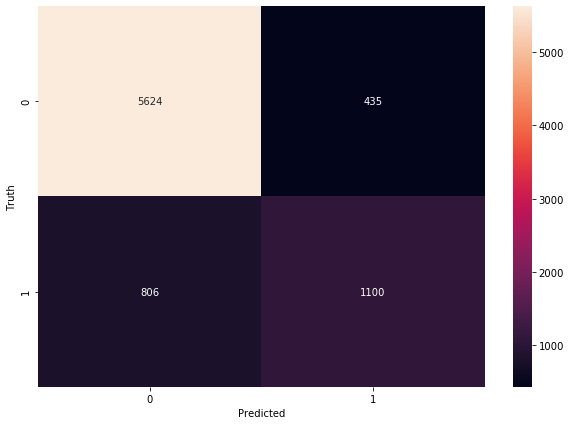

In [107]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# HYPER-PARAMETER TUNNING

In [108]:
y_prob=lr.predict_proba(X_test)

y_prob

array([[0.90140698, 0.09859302],
       [0.97273123, 0.02726877],
       [0.46449654, 0.53550346],
       ...,
       [0.62943696, 0.37056304],
       [0.96126079, 0.03873921],
       [0.98239101, 0.01760899]])

In [109]:
prob=pd.DataFrame(y_prob[:,1],columns=["sal_probability"])

In [111]:
y=pd.DataFrame(Y_test)
y.columns=["actual"]
y=y.reset_index(drop=True)

pred=pd.DataFrame(Y_pred,columns=["PRED_SAL"])

In [112]:
model1=pd.concat([pred,prob,y],axis=1)

In [113]:
model1

,PRED_SAL,sal_probability,actual
0,0,0.098593,0
1,0,0.027269,0
2,1,0.535503,1
3,1,0.535160,1
4,1,0.575315,1
...,...,...,...
7960,0,0.012220,0
7961,0,0.200720,0
7962,0,0.370563,0
7963,0,0.038739,0


# DRAW ROC CURVE

In [132]:
from sklearn.metrics import roc_curve, roc_auc_score

auc = roc_auc_score(Y_test, prob)
auc
fpr, tpr, thresholds = roc_curve(Y_test, prob)
fpr,thresholds,tpr
print(thresholds,fpr,tpr)


[2.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.55093935e-03
 1.50622532e-03 7.49888033e-04] [0.         0.         0.         ... 0.99900974 0.99933983 1.        ] [0.00000000e+00 5.24658972e-04 3.14795383e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


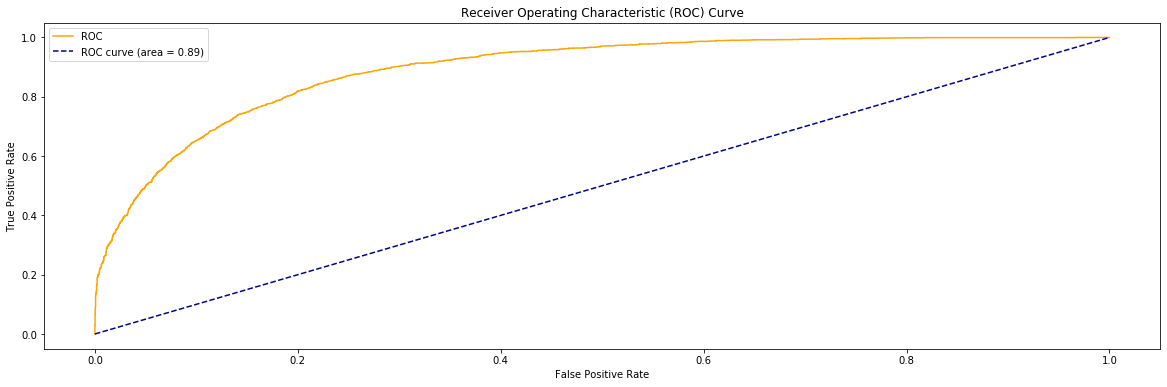

In [133]:
plt.figure(figsize=(20,6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### "LET'S ASSUME, HERE WE HAVE TO WORK ON FN(FALSE NEGATIVE),STRIVE TO FIND THE OPTIMAL THRESHOLD VALUE WHERE TRUE POSITIVE RATE WILL BE HIGH

In [138]:
from sklearn.metrics import recall_score,accuracy_score

TPR=[]
for i in thresholds:
    y_pred=np.where(prob>i,1,0)
    TPR.append(recall_score(Y_test,y_pred))

TPR





[0.0,
 0.0,
 0.0026232948583420775,
 0.0031479538300104933,
 0.004197271773347324,
 0.006820566631689402,
 0.007345225603357817,
 0.008919202518363064,
 0.00944386149003148,
 0.013116474291710388,
 0.013641133263378805,
 0.016789087093389297,
 0.017313746065057714,
 0.029905561385099685,
 0.030430220356768102,
 0.06453305351521511,
 0.06505771248688352,
 0.06663168940188877,
 0.06715634837355719,
 0.09024134312696747,
 0.09076600209863589,
 0.11437565582371459,
 0.114900314795383,
 0.1285414480587618,
 0.12906610703043023,
 0.13326337880377753,
 0.13378803777544596,
 0.13378803777544596,
 0.13431269674711438,
 0.1390346274921301,
 0.13955928646379853,
 0.14270724029380902,
 0.14323189926547744,
 0.1458551941238195,
 0.14637985309548793,
 0.16054564533053514,
 0.16107030430220357,
 0.1657922350472193,
 0.16631689401888772,
 0.16684155299055614,
 0.16736621196222456,
 0.16841552990556138,
 0.18677859391395593,
 0.18730325288562436,
 0.18992654774396642,
 0.19045120671563484,
 0.190975865

In [139]:
TPR_MODEL=pd.concat([pd.Series(TPR),pd.Series(thresholds)],axis=1)

TPR_MODEL.columns=["recall","threshold"]

TPR_MODEL.sort_values(by="recall",ascending=False,inplace=True)

t_MODEL=pd.DataFrame(TPR_MODEL)
t_MODEL=t_MODEL.reset_index()

In [141]:
t_MODEL

,index,recall,threshold
0,2495,1.000000,0.000750
1,2470,1.000000,0.002895
2,2468,1.000000,0.002943
3,2467,1.000000,0.002957
4,2466,1.000000,0.002993
...,...,...,...
2491,4,0.004197,1.000000
2492,3,0.003148,1.000000
2493,2,0.002623,1.000000
2494,1,0.000000,1.000000


In [142]:
ACC=[]
for i in thresholds:
    y_pred1=np.where(prob>i,1,0)
    ACC.append(accuracy_score(Y_test,y_pred1))

acc_sc=pd.DataFrame(ACC,columns=["accuracy"])

acc_model=pd.concat([acc_sc,pd.DataFrame(thresholds,columns=["threshold"])],axis=1)

acc_model.sort_values(by="accuracy",ascending=False,inplace=True)

acc_model=acc_model.reset_index()

new_model=pd.concat([acc_model,t_MODEL],axis=1)

new_model.sort_values(by="accuracy",inplace=True,ascending=False)

In [148]:
new_model.sort_values(by="accuracy",inplace=True,ascending=False)

In [146]:
pd.set_option("display.max_rows",None)

In [149]:
new_model

,index,accuracy,threshold,index,recall,threshold
0,577,0.844444,0.500928,2495,1.000000,0.000750
1,576,0.844444,0.500971,2470,1.000000,0.002895
2,584,0.844319,0.497576,2468,1.000000,0.002943
3,582,0.844319,0.498441,2467,1.000000,0.002957
4,512,0.844319,0.534233,2466,1.000000,0.002993
5,614,0.844319,0.480217,2465,1.000000,0.002999
6,575,0.844319,0.501027,2464,1.000000,0.003026
7,518,0.844319,0.530107,2463,1.000000,0.003050
8,580,0.844319,0.498931,2462,1.000000,0.003207
9,585,0.844319,0.497273,2461,1.000000,0.003250
